In [31]:
%matplotlib inline
%run 'bin/notebook_utils.py'

In [32]:
# Load wrangled data saved in .csv files for both synapse, microbenchmarks and gromacs.
sws_sessions = pd.read_csv('data/sessions.csv', index_col=0)
sws_pilots = pd.read_csv('data/pilots.csv', index_col=0)
sws_units = pd.read_csv('data/units.csv', index_col=0)



In [ ]:
# Load wrangled data saved in .csv files for both orte, mpi-exec.
sws_sessions = pd.read_csv('data/sessions.csv', index_col=0)
sws_pilots = pd.read_csv('data/pilots.csv', index_col=0)
sws_units = pd.read_csv('data/units.csv', index_col=0)


In [33]:
sws = sws_sessions[
    ['nunit','TTC','P_LRMS_QUEUING','U_AGENT_QUEUING','U_AGENT_SCHEDULING','U_AGENT_QUEUING_EXEC','U_AGENT_EXECUTING']
        ].groupby(['nunit']).aggregate(
                {'TTC'                 : ['mean','std'],
                 'P_LRMS_QUEUING'      : ['mean','std'],
                 'U_AGENT_QUEUING'     : ['mean','std'],
                 'U_AGENT_SCHEDULING'  : ['mean','std'],
                 'U_AGENT_QUEUING_EXEC': ['mean','std'],
                 'U_AGENT_EXECUTING'   : ['mean','std']})

sws.rename({'P_LRMS_QUEUING'      :'TTQ'}, axis='columns', inplace=True)
sws.rename({'U_AGENT_QUEUING'     :'Agent queueing'}, axis='columns', inplace=True)
sws.rename({'U_AGENT_SCHEDULING'  :'Agent scheduling'}, axis='columns', inplace=True)
sws.rename({'U_AGENT_QUEUING_EXEC':'Agent queueing execution'}, axis='columns', inplace=True)
sws.rename({'U_AGENT_EXECUTING'   :'TTX'}, axis='columns', inplace=True)
sws.rename(index={i: '%s/%s' % (i, i*32) for i in sws.index.get_values()}, inplace=True)
sws

TTQ             Agent queueing           Agent queueing execution                   TTX                    TTC             Agent scheduling          
               mean         std           mean       std                     mean       std        mean        std        mean         std             mean       std
nunit                                                                                                                                                                
20/640   130.599433  163.486533       0.004467  0.000153                 0.186167  0.005750  720.712433   0.010858  890.553733  163.555456         0.026233  0.000058
40/1280  167.550767  212.022059       0.008833  0.001965                 0.364900  0.042873  724.641400   5.978088  930.216200  208.035312         0.051800  0.002007
80/2560  125.839700  130.571010       0.028100  0.012366                 0.561800  0.213833  757.205000  30.728219  920.884133  100.083869         0.101767  0.007184

In [42]:
sws_units.columns.values

array(['AGENT_EXECUTING', 'AGENT_EXECUTING_PENDING', 'AGENT_SCHEDULING',
       'AGENT_SCHEDULING_PENDING', 'AGENT_STAGING_INPUT',
       'AGENT_STAGING_INPUT_PENDING', 'AGENT_STAGING_OUTPUT',
       'AGENT_STAGING_OUTPUT_PENDING', 'CANCELED', 'DONE', 'FAILED',
       'NEW', 'UMGR_SCHEDULING', 'UMGR_SCHEDULING_PENDING',
       'UMGR_STAGING_INPUT', 'UMGR_STAGING_INPUT_PENDING',
       'UMGR_STAGING_OUTPUT', 'UMGR_STAGING_OUTPUT_PENDING',
       'U_AGENT_EXECUTING', 'U_AGENT_QUEUING', 'U_AGENT_QUEUING_EXEC',
       'U_AGENT_SCHEDULING', 'U_UMGR_BINDING', 'U_UMGR_SCHEDULING',
       'experiment', 'hid', 'pid', 'sid', 'uid', 'util_u_eprep',
       'util_u_equeue', 'util_u_exec_app', 'util_u_exec_cu',
       'util_u_exec_orte', 'util_u_exec_rp', 'util_u_total',
       'util_u_unschedule'], dtype=object)

In [44]:
sws_pilots.columns.values

array(['CANCELED', 'DONE', 'FAILED', 'NEW', 'PMGR_ACTIVE',
       'PMGR_ACTIVE_PENDING', 'PMGR_LAUNCHING', 'PMGR_LAUNCHING_PENDING',
       'P_LRMS_QUEUING', 'P_LRMS_RUNNING', 'P_LRMS_SUBMITTING',
       'P_PMGR_QUEUING', 'P_PMGR_SCHEDULING', 'experiment', 'hid',
       'ncore', 'nunit', 'pid', 'sid', 'util_p_boot', 'util_p_orte',
       'util_p_setup_1', 'util_p_setup_2', 'util_p_term', 'util_p_total',
       'util_p_uexec'], dtype=object)

In [45]:
sws_pilots.columns.values

array(['CANCELED', 'DONE', 'FAILED', 'NEW', 'PMGR_ACTIVE',
       'PMGR_ACTIVE_PENDING', 'PMGR_LAUNCHING', 'PMGR_LAUNCHING_PENDING',
       'P_LRMS_QUEUING', 'P_LRMS_RUNNING', 'P_LRMS_SUBMITTING',
       'P_PMGR_QUEUING', 'P_PMGR_SCHEDULING', 'experiment', 'hid',
       'ncore', 'nunit', 'pid', 'sid', 'util_p_boot', 'util_p_orte',
       'util_p_setup_1', 'util_p_setup_2', 'util_p_term', 'util_p_total',
       'util_p_uexec'], dtype=object)

In [34]:
# Load sessions for orte  experiment weak scaling
ws_sras = load_sessions_units('data', 
                     sws_sessions, 
                     sorted(sws_sessions.nunit.unique().tolist()))

KeyError: 'exec_ok'

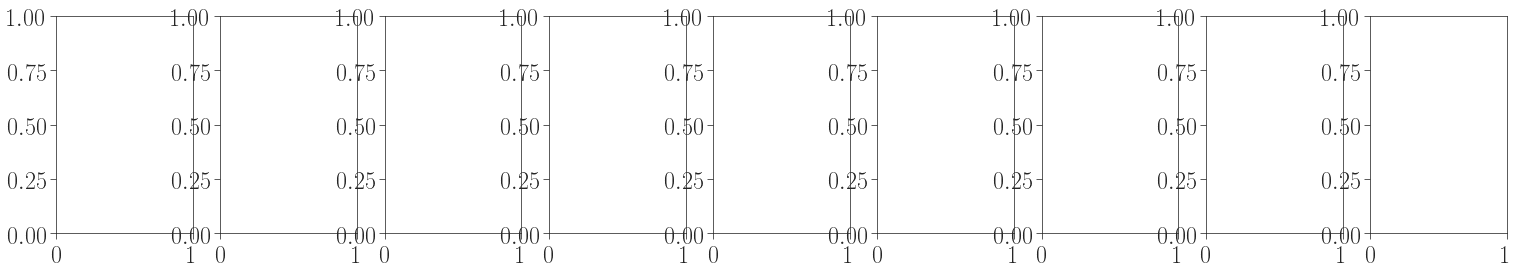

In [53]:
nunits = [20,20,20,40,40,40,80,80,80]  #experiments
fwidth = 26
fhight = 4
fig, axarr = plt.subplots(1, len(nunits), sharex='col', figsize=(fwidth,fhight))#, sharey='row')

i = 0
j = 'a'
for nunit in nunits:
    session  = ws_sras[nunit][0]

    # Get events and order them by Scheduling
    df = get_df_unit_events(session)
    df = df.sort_values(by='Scheduler Queues CU')
    df = df.reset_index(drop=True)
    #df = df[['Scheduler Starts Schedule' , 
    #         'CU Spawns Executable'      , 
    #         'Executable Starts']]
    df = df.dropna(axis=1, how='all')
    #df = df.sub(df['Scheduler Starts Schedule'][0])

    # Set axes properties
    #ax = axarr[i]
    #ax.spines["top"].set_visible(False)  
    #ax.spines["right"].set_visible(False)  
    #ax.get_xaxis().tick_bottom()  
    #ax.get_yaxis().tick_left()
    #ax.title.set_text('%s/%s Task/Core' % (nunit, nunit*32))

    # Plot data
    #d = df['Executable Starts']-df['CU Spawns Executable']
    
    ## weak scaling experiments
    d_time_to_accept_exec = df['exec_ok']   - df['exec_start']  ## ticket
    
    d_time_to_launch_app_start = df['cu_exec_start'] - df['app_start']  ## good
    
    d_app_stop_to_launch_method = df['cu_exec_stop']  - df['app_stop']  ##  good
    
    df_time_to_take_control_back = df['exec_stop']  - df['cu_exec_stop']  ## ticket
    
      
    #data_mean = np.mean(d.tolist())
    #data_sigma = np.sqrt(np.var(d.tolist()))
    
    #display('Mean %s/%s tasks/cores: %s (s%s)' % (nunit, nunit*1, data_mean, data_sigma))

    #ax.hist(d.tolist(), bins=50, color=tableau20[16]) #, histtype='step')
    #ax.axvline(x=data_mean, color='black', linestyle='dashed')
    #ax.axvspan(data_mean-data_sigma, data_mean+data_sigma, alpha=0.25, color=tableau20[16])

    # Add subfigure label and increment counters
    #ax.set_xlabel('(%s)' % j, labelpad=45)
    #i = i+1
    #j = chr(ord(j) + 1)

# Add common axes lables
#fig.text(0.085, 0.5, 'Number of Tasks', va='center', rotation='vertical', fontsize=24)
#fig.text(0.5, -0.08, 'Time (s)', ha='center', fontsize=24)
    
# Add common legend with f* proxy artists (https://matplotlib.org/users/legend_guide.html)
#fig.legend((
#                mpl.lines.Line2D([], [], color=tableau20[16]),
#                mpl.lines.Line2D([], [], color='black', linestyle='dashed'),
#                mpl.lines.Line2D([], [], color=tableau20[16], alpha=0.25)
#           ),
#           (
#                'Orte Start Overhead',
#                'Mean',
#                '$\sigma$',
#                
#           ), 
#           'upper center',
#           bbox_to_anchor=(0.44, 1.4),
#           fontsize=20,
#           ncol=6)

##plt.savefig('figures/titan_synapse_strong_scaling_orte_spawning.pdf', dpi=300, bbox_inches='tight')

